<a href="https://colab.research.google.com/github/Piyushmittal2192/3d-structure-Clustering/blob/main/notebooks/2d_shape_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyclustering
!pip install brewer2mpl

     |████████████████████████████████| 2.6 MB 25.5 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=8c4e054bd2e152dea805e4be296ccaee15192d47227a68bfe22e72517b1d424a
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [25]:
!pip install pycluster

ERROR: Could not find a version that satisfies the requirement pycluster (from versions: none)
ERROR: No matching distribution found for pycluster


In [12]:
import numpy as np
from matplotlib.pyplot import plot as plt
from matplotlib.pyplot import text
# import Pycluster as pc
import brewer2mpl


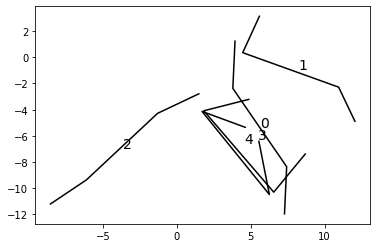

In [13]:
shapes = np.array([[[1,4],[4,2],[11,2],[14,0]],
          [[4,5],[4,2],[11,2],[13,0]],
          [[1,3],[4,2],[11,2],[14,1.5]],
          [[3,5],[4,2],[10,7],[7,9]],
          [[5,5],[4,2],[10,7],[6,6]]])

def random_rotation():
    theta = 3 * np.pi * np.random.random()
    rotMatrix = np.array([[np.cos(theta), -np.sin(theta)], 
                             [np.sin(theta),  np.cos(theta)]])
    return rotMatrix

new_shapes = []
for s in shapes:
    rr = random_rotation()
    new_shapes += [[list(rr.dot(p)) + [0] for p in s]]
new_shapes = np.array(new_shapes)

for i, s in enumerate(new_shapes):
    plt(s[:,0], s[:,1], color='black')
    text(np.mean(s[:,0]), np.mean(s[:,1]), str(i), fontsize=14)

In [14]:
import itertools as it
import math
def vec_distance(v1, v2):
    '''
    The distance between two vectors.
    '''
    diff = v2 - v1
    return math.sqrt(sum(diff * diff))

def distances(s):
    '''
    Compute the distance array for a shape s.
    '''
    ds = [vec_distance(p1, p2) for p1,p2 in it.combinations(s, r=2)]

    return np.array(ds)


# create an array of inter-shape distances for each shape
darray = np.array([distances(s) for s in new_shapes])

In [15]:
darray

array([[ 3.60555128, 10.19803903, 13.60147051,  7.        , 10.19803903,
         3.60555128],
       [ 3.        ,  7.61577311, 10.29563014,  7.        ,  9.21954446,
         2.82842712],
       [ 3.16227766, 10.04987562, 13.08625233,  7.        , 10.0124922 ,
         3.04138127],
       [ 3.16227766,  7.28010989,  5.65685425,  7.81024968,  7.61577311,
         3.60555128],
       [ 3.16227766,  5.38516481,  1.41421356,  7.81024968,  4.47213595,
         4.12310563]])

In [23]:
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(darray)
kmeans.labels_

array([1, 1, 1, 0, 0], dtype=int32)

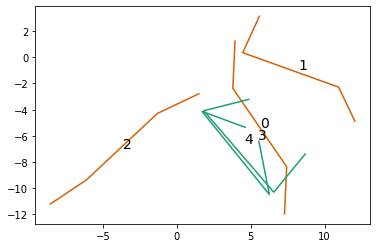

In [27]:
dark2 = brewer2mpl.get_map('Dark2', 'qualitative', 4).mpl_colors

for i,(s,c) in enumerate(zip(new_shapes, kmeans.labels_)):
    plt(s[:,0], s[:,1], color=dark2[c])
    text(np.mean(s[:,0]), np.mean(s[:,1]), str(i), fontsize=14)